<a href="https://colab.research.google.com/github/annvorosh/GB/blob/ML_Med/ML_Med_L03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ - Построить три различные типа классификаторов, обязательно одну из них Keras или PyTorch.
https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis
c этим датасетом будем работать на уроке.

Этот набор данных был получен в ретроспективном исследовании из когорты педиатрических пациентов, поступивших с болью в животе в Детскую больницу St. Хедвиг в Регенсбурге, Германия. Для большинства пациентов было получено несколько ультразвуковых изображений брюшной полости B-режима, при этом количество просмотров варьируется от 1 до 15. Изображения изображают различные области, представляющие интерес, такие как правый нижний квадрант живота, аппендикс, кишечник, лимфатические узлы и репродуктивные органы. Наряду с несколькими изображениями США для каждого субъекта, набор данных включает в себя информацию, охватывающую лабораторные тесты, результаты физического обследования, клинические результаты, такие как оценки Альварадо и детского аппендицита, а также результаты ультразвуковых исследований, полученные экспертами. Наконец, испытуемые были помечены тремя целевыми переменными: диагностика (аппендицит против аппендицита), управление (хирургический против консервативного) и тяжесть (сложный или неосложненный аппендицит или отсутствие).

#### Заполнить пропуски наиболее релеватным путем, аргументировать это Таргетом оставляем признак - болен аппендицитом или нет.

Построить три различные типа классификаторов, обязательно одну из них Keras или PyTorch.

Построить графики функции потерь на трейне и тесте.

Визуализировать важность признаков с точки зрения модели - чемпиона.

Составить грамотный обобщающий вывод.
Сдавать как обычно - Гитхаб или Гугл Колаб.

## Загрузка библиотек

In [154]:
import warnings
warnings.filterwarnings(action='ignore')

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [156]:
from sklearn.linear_model import LogisticRegression, ElasticNetCV, RidgeCV, LassoCV, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [158]:
import torch
import torch.nn as nn
import torch.optim as optim

## Загрузка данных

In [159]:
!pip install ucimlrepo

In [160]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
X = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets

In [161]:
# # metadata
# print(regensburg_pediatric_appendicitis.metadata)

# # variable information
# print(regensburg_pediatric_appendicitis.variables)

## Обзор и предобработка данных

In [162]:
X.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,NaN,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


надо будет нормализовать данные

In [163]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [164]:
X.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000
mean,11.346451,18.907012,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.386900
std,3.529909,4.385331,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433854
min,0.000000,7.830000,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000
25%,9.200000,15.725000,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000
50%,11.440000,18.060000,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000
75%,14.100000,21.180000,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000
max,18.360000,38.160000,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000


In [165]:
y.describe()

,Management,Severity,Diagnosis
count,781,781,780
unique,4,2,2
top,conservative,uncomplicated,appendicitis
freq,483,662,463


Целевая переменная Diagnosis, поэтому Management и Severity удаляем.

In [166]:
# Оставляем только столбец 'Diagnosis'
y = y[['Diagnosis']]

In [167]:
y.describe()

,Diagnosis
count,780
unique,2
top,appendicitis
freq,463


In [168]:
X.isnull().sum()

Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Segmented_Neutrophils               728
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  26
Thrombocyte_Count                    18


In [169]:
# Обзор пропусков
X[X.isnull().any(axis=1)]

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.90,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.90,male,147.0,69.5,2.0,5.0,4.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.30,female,163.0,62.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.60,female,165.0,56.0,3.0,7.0,6.0,no,NaN,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.90,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.41,25.25,female,166.5,70.0,4.0,8.0,7.0,yes,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,17.09,20.43,female,158.0,51.0,6.0,5.0,3.0,no,NaN,...,Douglas,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
779,14.99,19.91,female,152.0,46.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unauffällig
780,7.20,14.30,male,129.3,23.9,5.0,9.0,8.0,yes,14.0,...,NaN,no,NaN,yes,NaN,no,NaN,NaN,NaN,NaN


Во всех объектах есть пропуски.

### Вычисление матрицы корреляции

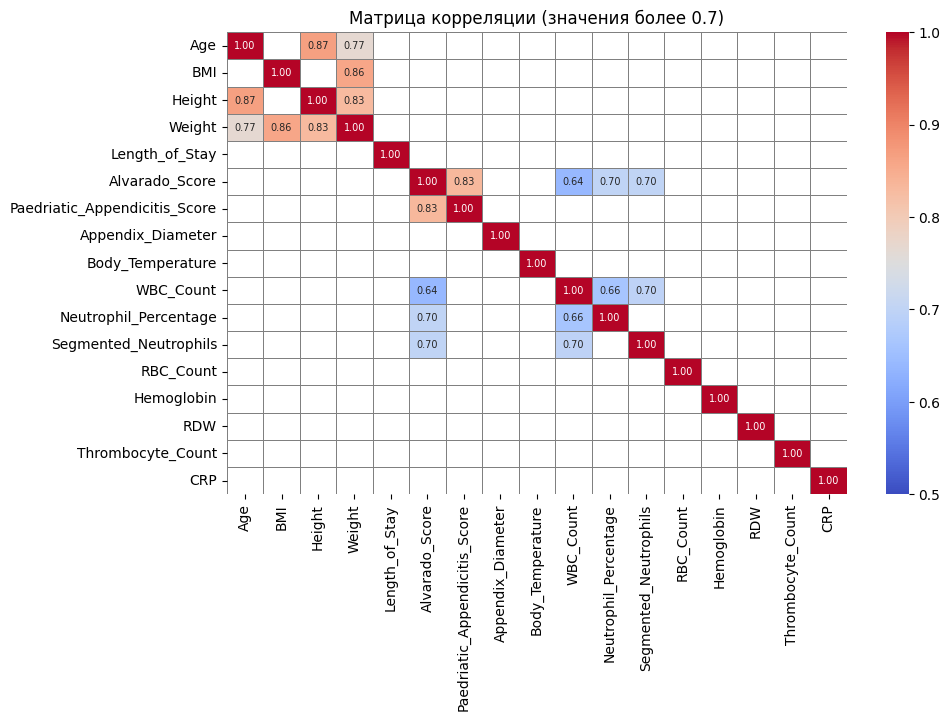

In [170]:
# Удалить нечисловые столбцы
X_numeric = X.select_dtypes(include=[float, int])

# Вычисление матрицы корреляции
correlation_matrix = X_numeric.corr()

# Отфильтровать значения корреляции более 0.6
correlation_matrix_filtered = correlation_matrix.mask(correlation_matrix <= 0.6)

# Создание тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_filtered,annot=True, cmap='coolwarm', fmt=".2f", vmin=0.5, linewidths=0.5, linecolor='gray', annot_kws={"size": 7})
plt.title('Матрица корреляции (значения более 0.7)')
plt.show()

Наиболее сильная корреляция:
Исходя из матрицы корреляции, можно рассмотреть для удаления:

'Alvarado_Score', 'Weight'


In [171]:
X.columns

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay',
       'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US',
       'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
       'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria',
       'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
       'US_Performed', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign',
       'Appendicolith', 'Perfusion', 'Perforation',
       'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus',
       'Coprostasis', 'Me

### Удаление излишних фичей


1. Проанализировав матрицу корреляции приняли решение по удалению фичей:

In [172]:
X = X[['Age', 'BMI', 'Sex', 'Length_of_Stay',
       'Paedriatic_Appendicitis_Score', 'Appendix_on_US',
       'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature',
       'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
       'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria',
       'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
       'US_Performed', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign',
       'Appendicolith', 'Perfusion', 'Perforation',
       'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus',
       'Coprostasis', 'Meteorism', 'Enteritis', 'Gynecological_Findings']]


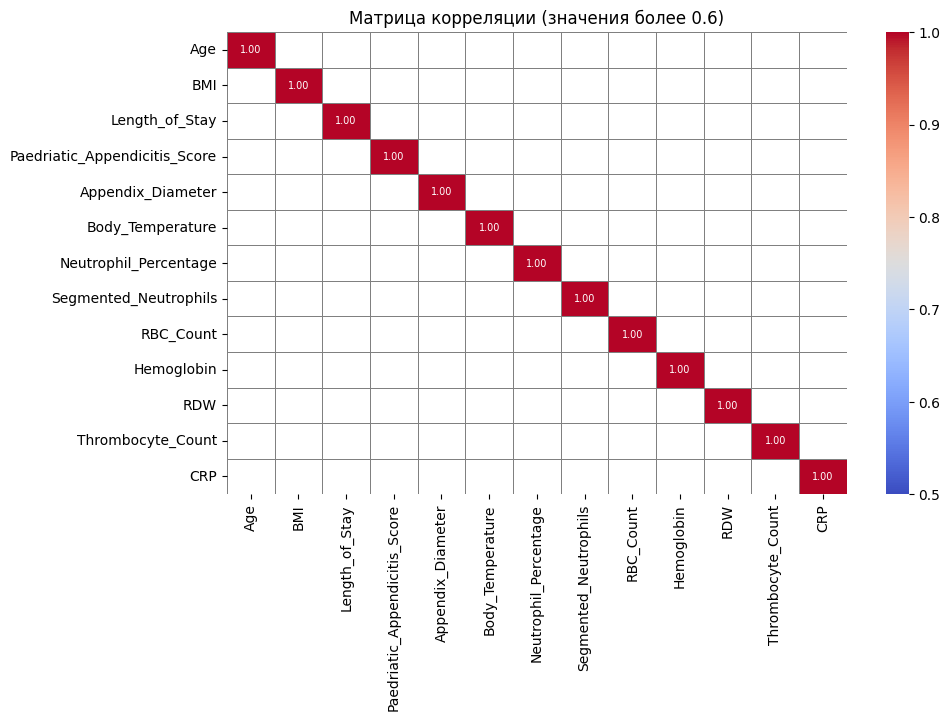

In [173]:
# Удалить нечисловые столбцы
X_numeric = X.select_dtypes(include=[float, int])

# Вычисление матрицы корреляции
correlation_matrix = X_numeric.corr()

# Отфильтровать значения корреляции более 0.6
correlation_matrix_filtered = correlation_matrix.mask(correlation_matrix < 0.6)

# Создание тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_filtered,annot=True, cmap='coolwarm', fmt=".2f", vmin=0.5, linewidths=0.5, linecolor='gray', annot_kws={"size": 7})
plt.title('Матрица корреляции (значения более 0.6)')
plt.show()

2. Удаление столбцов, содержщих слишком много пропусков

In [174]:
# Вычисление процента пропущенных значений для каждого столбца
missing_percentage = X.isnull().mean() * 100
missing_percentage

Age                                  0.127877
BMI                                  3.452685
Sex                                  0.255754
Length_of_Stay                       0.511509
Paedriatic_Appendicitis_Score        6.649616
Appendix_on_US                       0.639386
Appendix_Diameter                   36.317136
Migratory_Pain                       1.150895
Lower_Right_Abd_Pain                 1.023018
Contralateral_Rebound_Tenderness     1.918159
Coughing_Pain                        2.046036
Nausea                               1.023018
Loss_of_Appetite                     1.278772
Body_Temperature                     0.895141
Neutrophil_Percentage               13.171355
Segmented_Neutrophils               93.094629
Neutrophilia                         6.393862
RBC_Count                            2.301790
Hemoglobin                           2.301790
RDW                                  3.324808
Thrombocyte_Count                    2.301790
Ketones_in_Urine                  

In [175]:
# Удаление столбцов с более чем 40% пропущенных значений
X = X.loc[:, missing_percentage <= 40]
# X.isnull().mean() * 100

In [176]:
X['Age'].describe()

count    781.000000
mean      11.346451
std        3.529909
min        0.000000
25%        9.200000
50%       11.440000
75%       14.100000
max       18.360000
Name: Age, dtype: float64

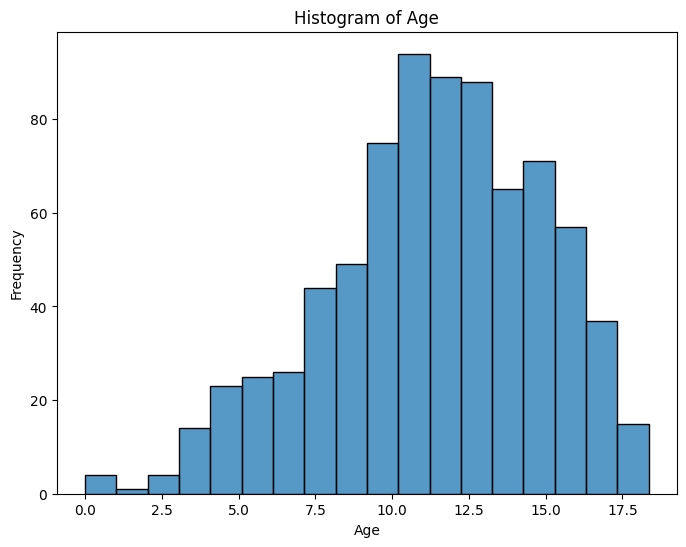

In [177]:
# Построение гистограммы для столбца 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(X['Age'], bins=18, kde=False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Удаление пациентов до 3х лет
Пациентов до трех лет уберем из анализа, так как их показатели сильно непредсказуемы и их совсем немного.

In [178]:
df = pd.concat([X, y], axis=1)

In [179]:
# Удаление пациентов младше трех лет
df = df[df['Age'] >= 3]

In [180]:
df['Age'].describe()

count    772.000000
mean      11.462226
std        3.380671
min        3.160000
25%        9.260000
50%       11.480000
75%       14.117500
max       18.360000
Name: Age, dtype: float64

In [181]:
df.isnull().mean() * 100

Age                                  0.000000
BMI                                  3.367876
Sex                                  0.129534
Length_of_Stay                       0.388601
Paedriatic_Appendicitis_Score        6.476684
Appendix_on_US                       0.518135
Appendix_Diameter                   36.139896
Migratory_Pain                       1.036269
Lower_Right_Abd_Pain                 0.906736
Contralateral_Rebound_Tenderness     1.683938
Coughing_Pain                        1.813472
Nausea                               0.906736
Loss_of_Appetite                     1.165803
Body_Temperature                     0.777202
Neutrophil_Percentage               13.212435
Neutrophilia                         6.347150
RBC_Count                            2.202073
Hemoglobin                           2.202073
RDW                                  3.108808
Thrombocyte_Count                    2.202073
Ketones_in_Urine                    25.000000
RBC_in_Urine                      

Так как РАS(Предсказывает аппендицит у детей) и Appendix_Diameter прямо сколлерированы с диагнозом

In [182]:
df = df.drop (['Appendix_Diameter', 'Paedriatic_Appendicitis_Score' ], axis = 1)

In [183]:
# Удаление строк с пропущенными значениями в столбце 'Target'
df = df.dropna(subset=['Diagnosis'])

In [184]:
df.Diagnosis.isnull().mean() * 100

0.0

### Борьба с пропусками

In [185]:
# Округлим возраст
df['Age'] = df['Age'].round()

# Заполнение пропусков в BMI медианой из соответствующего возраста
df['BMI'] = df.groupby('Age')['BMI'].transform(lambda x: x.fillna(x.median()))

In [186]:
df.isnull().mean() * 100

Age                                  0.000000
BMI                                  0.000000
Sex                                  0.129702
Length_of_Stay                       0.389105
Appendix_on_US                       0.389105
Migratory_Pain                       0.907912
Lower_Right_Abd_Pain                 0.778210
Contralateral_Rebound_Tenderness     1.556420
Coughing_Pain                        1.686122
Nausea                               0.778210
Loss_of_Appetite                     1.037613
Body_Temperature                     0.648508
Neutrophil_Percentage               13.099870
Neutrophilia                         6.225681
RBC_Count                            2.075227
Hemoglobin                           2.075227
RDW                                  2.983139
Thrombocyte_Count                    2.075227
Ketones_in_Urine                    24.902724
RBC_in_Urine                        25.680934
WBC_in_Urine                        24.773022
CRP                               

In [187]:
df.dtypes

Age                                 float64
BMI                                 float64
Sex                                  object
Length_of_Stay                      float64
Appendix_on_US                       object
Migratory_Pain                       object
Lower_Right_Abd_Pain                 object
Contralateral_Rebound_Tenderness     object
Coughing_Pain                        object
Nausea                               object
Loss_of_Appetite                     object
Body_Temperature                    float64
Neutrophil_Percentage               float64
Neutrophilia                         object
RBC_Count                           float64
Hemoglobin                          float64
RDW                                 float64
Thrombocyte_Count                   float64
Ketones_in_Urine                     object
RBC_in_Urine                         object
WBC_in_Urine                         object
CRP                                 float64
Dysuria                         

#### Категориальные переменные

In [188]:
# Выбор столбцов типа 'object'
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Sex', 'Appendix_on_US', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine', 'RBC_in_Urine',
       'WBC_in_Urine', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign',
       'Ipsilateral_Rebound_Tenderness', 'US_Performed', 'Free_Fluids',
       'Diagnosis'],
      dtype='object')

In [189]:
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

Sex: ['female' 'male' nan]
Appendix_on_US: ['yes' 'no' nan]
Migratory_Pain: ['no' 'yes' nan]
Lower_Right_Abd_Pain: ['yes' 'no' nan]
Contralateral_Rebound_Tenderness: ['yes' 'no' nan]
Coughing_Pain: ['no' 'yes' nan]
Nausea: ['no' 'yes' nan]
Loss_of_Appetite: ['yes' 'no' nan]
Neutrophilia: ['no' 'yes' nan]
Ketones_in_Urine: ['++' 'no' nan '+++' '+']
RBC_in_Urine: ['+' 'no' nan '++' '+++']
WBC_in_Urine: ['no' '+' nan '+++' '++']
Dysuria: ['no' 'yes' nan]
Stool: ['normal' 'constipation' 'diarrhea' nan]
Peritonitis: ['no' 'local' 'generalized' nan]
Psoas_Sign: ['yes' 'no' nan]
Ipsilateral_Rebound_Tenderness: ['no' 'yes' nan]
US_Performed: ['yes' 'no' nan]
Free_Fluids: ['no' 'yes' nan]
Diagnosis: ['appendicitis' 'no appendicitis']


In [190]:
# Конвертация столбцов типа object в category, это  улучшает производительность и уменьшает объем занимаемой памяти.
df[categorical_columns] = df[categorical_columns].astype('category')

In [191]:
# Заполнение пропусков модой
for column in categorical_columns:
    most_frequent = df[column].mode()[0]
    df[column].fillna(most_frequent, inplace=True)

#### Числовые переменные

In [192]:
# Определение цифровых колонок
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['Age', 'BMI', 'Length_of_Stay', 'Body_Temperature',
       'Neutrophil_Percentage', 'RBC_Count', 'Hemoglobin', 'RDW',
       'Thrombocyte_Count', 'CRP'],
      dtype='object')

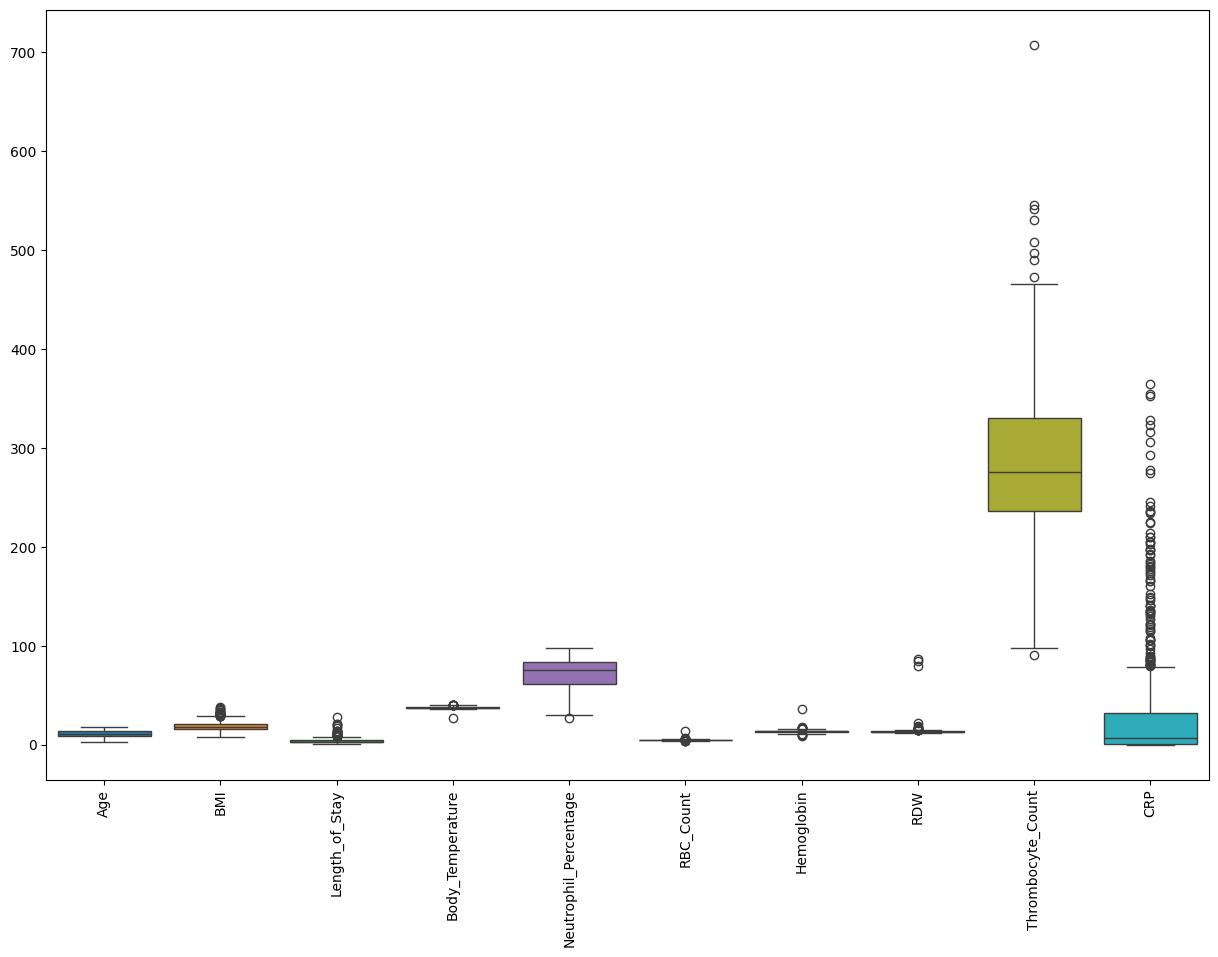

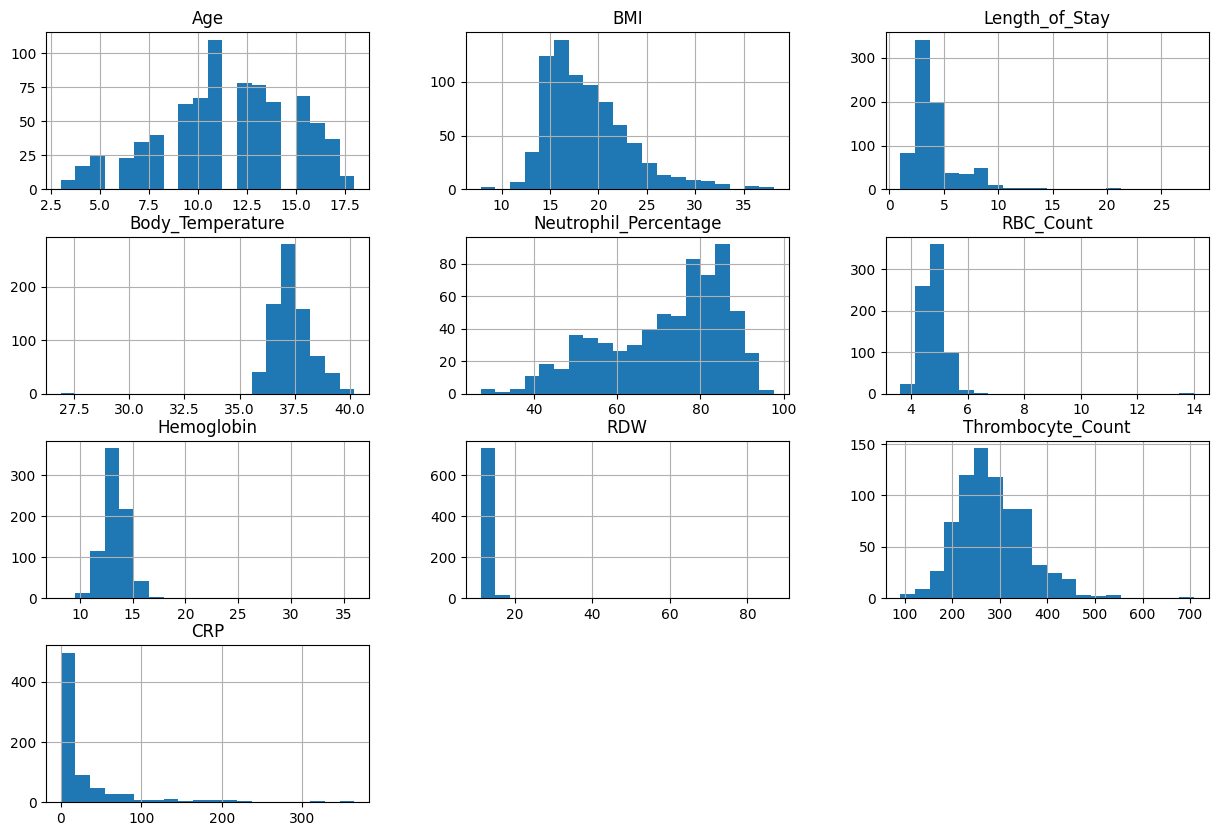

In [193]:
# Создание боксплотов для всех числовых колонок
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.show()

# Создание гистограмм для всех числовых колонок
df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.show()

Во многих переменных отмечаются помимо пропусков выбросы.


In [194]:
# Заполнение пропусков медианой для каждой цифровой колонки, так как медиана менее чувствительна к выбросам
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

# df.isnull().sum()

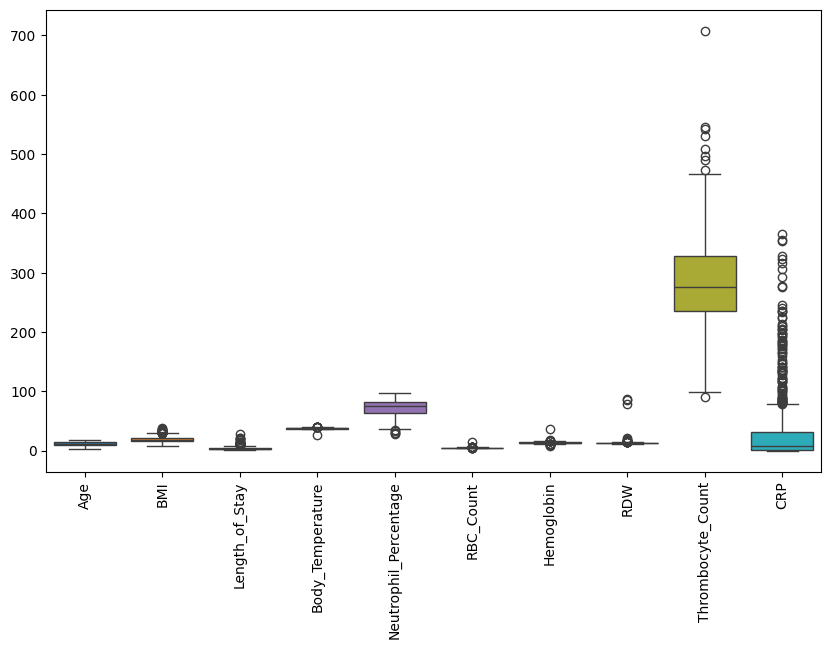

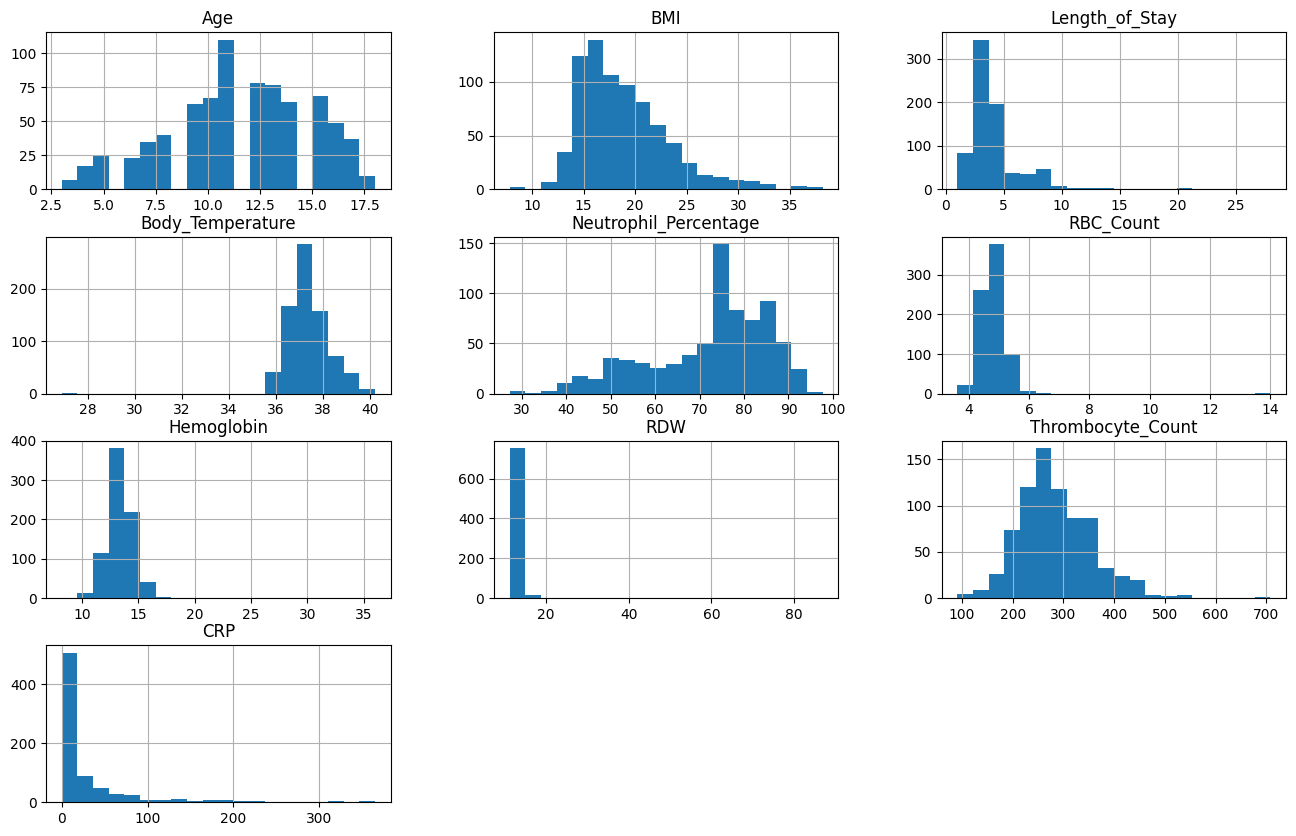

In [195]:
# Создание боксплотов для всех числовых колонок
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.show()

# Создание гистограмм для всех числовых колонок
df[numeric_columns].hist(figsize=(16, 10), bins=20)
plt.show()

Для определения, какие выбросы следует обработать, давайте посмотрим на графики и выявим наиболее заметные выбросы. Выбросы тоже следует заменить медианой.

**Boxplot и Histogram анализ**

*Thrombocyte_Count и CRP:*
Множество выбросов, которые могут повлиять на анализ.

*Neutrophil_Percentage, Length_of_Stay и RDW:*
Есть заметные выбросы.

*Body_Temperature:*
Выбросы видны на гистограмме.

In [196]:
# Колонки для обработки выбросов
outlier_columns = [
    'Length_of_Stay',
    'Neutrophil_Percentage',
    'RDW',
    'Thrombocyte_Count',
    'CRP',
    'Body_Temperature'
]


# Функция для замены выбросов медианными значениями
def replace_outliers_with_median(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.15)
        Q3 = df[col].quantile(0.85)
        IQR = Q3 - Q1 # размах
        lower_bound = Q1 - 1.5 * IQR # нижняя граница выбросов
        upper_bound = Q3 + 1.5 * IQR # верхняя граница выбросов

        median = df[col].median()

        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])
    return df

In [197]:
df = replace_outliers_with_median(df, outlier_columns)

In [198]:
# Стандартизация числовых колонок
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

### Энкодинг

In [199]:
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

Sex: ['female', 'male']
Categories (2, object): ['female', 'male']
Appendix_on_US: ['yes', 'no']
Categories (2, object): ['no', 'yes']
Migratory_Pain: ['no', 'yes']
Categories (2, object): ['no', 'yes']
Lower_Right_Abd_Pain: ['yes', 'no']
Categories (2, object): ['no', 'yes']
Contralateral_Rebound_Tenderness: ['yes', 'no']
Categories (2, object): ['no', 'yes']
Coughing_Pain: ['no', 'yes']
Categories (2, object): ['no', 'yes']
Nausea: ['no', 'yes']
Categories (2, object): ['no', 'yes']
Loss_of_Appetite: ['yes', 'no']
Categories (2, object): ['no', 'yes']
Neutrophilia: ['no', 'yes']
Categories (2, object): ['no', 'yes']
Ketones_in_Urine: ['++', 'no', '+++', '+']
Categories (4, object): ['+', '++', '+++', 'no']
RBC_in_Urine: ['+', 'no', '++', '+++']
Categories (4, object): ['+', '++', '+++', 'no']
WBC_in_Urine: ['no', '+', '+++', '++']
Categories (4, object): ['+', '++', '+++', 'no']
Dysuria: ['no', 'yes']
Categories (2, object): ['no', 'yes']
Stool: ['normal', 'constipation', 'diarrhea']

Перевод категориальных данных в бинарные, это будет полезно в случае применения моделей, которые не работают с категориальными признаками.

- Бинарные (двухкатегорийные) признаки:

Преобразуются с помощью LabelEncoder, где одна категория становится 0, а другая — 1.

- Многокатегорийные признаки:

Преобразуются с помощью OneHotEncoder, создавая несколько бинарных столбцов для каждой категории.

In [200]:
# Список бинарных признаков
binary_columns = [
    'Sex', 'Appendix_on_US', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
    'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite',
    'Neutrophilia', 'Dysuria', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
    'US_Performed', 'Free_Fluids', 'Diagnosis'
]

# Применение LabelEncoder для бинарных признаков
label_encoder = LabelEncoder()
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

df[binary_columns].head()

,Sex,Appendix_on_US,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Neutrophilia,Dysuria,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,Free_Fluids,Diagnosis
0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0
1,1,0,1,1,1,0,0,1,0,1,1,0,1,0,1
2,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1
3,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1
4,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0


In [201]:
# Список многокатегорийных признаков
multi_cat_columns = ['Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'Stool', 'Peritonitis']

# Применение OneHotEncoder для многокатегорийных признаков
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_multi_cat = one_hot_encoder.fit_transform(df[multi_cat_columns])

# Получение названий новых столбцов
encoded_multi_cat_columns = one_hot_encoder.get_feature_names_out(multi_cat_columns)

# Создание DataFrame из новых столбцов
encoded_multi_cat_df = pd.DataFrame(encoded_multi_cat, columns=encoded_multi_cat_columns, index=df.index)

# Соединение нового DataFrame с исходным
df = df.drop(columns=multi_cat_columns).join(encoded_multi_cat_df)

df.head()


,Age,BMI,Sex,Length_of_Stay,Appendix_on_US,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,...,RBC_in_Urine_++,RBC_in_Urine_+++,RBC_in_Urine_no,WBC_in_Urine_++,WBC_in_Urine_+++,WBC_in_Urine_no,Stool_diarrhea,Stool_normal,Peritonitis_local,Peritonitis_no
0,0.455941,-0.461735,0,-0.547104,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.749372,2.990132,1,-1.102126,0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.749372,1.011061,0,0.007919,0,0,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.336234,0.389725,0,-0.547104,0,1,1,0,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.130921,-0.461735,0,-0.547104,1,0,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [202]:
df.Diagnosis.head()

0    0
1    1
2    1
3    1
4    0
Name: Diagnosis, dtype: int64

### Разделим данные на тест и трейн

In [203]:
# Разделение DataFrame на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [204]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Устраним дисбаланс данных

In [205]:
y_train.value_counts()


Diagnosis
0    367
1    249
Name: count, dtype: int64

In [206]:
# Применение SMOTE для генерации новых данных к обучающим данным
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Проверка новых размеров классов
y_train.value_counts()

Diagnosis
0    367
1    367
Name: count, dtype: int64

## Модели ML

### LogisticRegression

In [207]:
# Логистическая регрессия
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Логистическая регрессия")
print("Точность:", accuracy_log_reg)
print(classification_report(y_test, y_pred_log_reg))

Логистическая регрессия
Точность: 0.7870967741935484
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        89
           1       0.71      0.85      0.77        66

    accuracy                           0.79       155
   macro avg       0.79      0.80      0.79       155
weighted avg       0.80      0.79      0.79       155



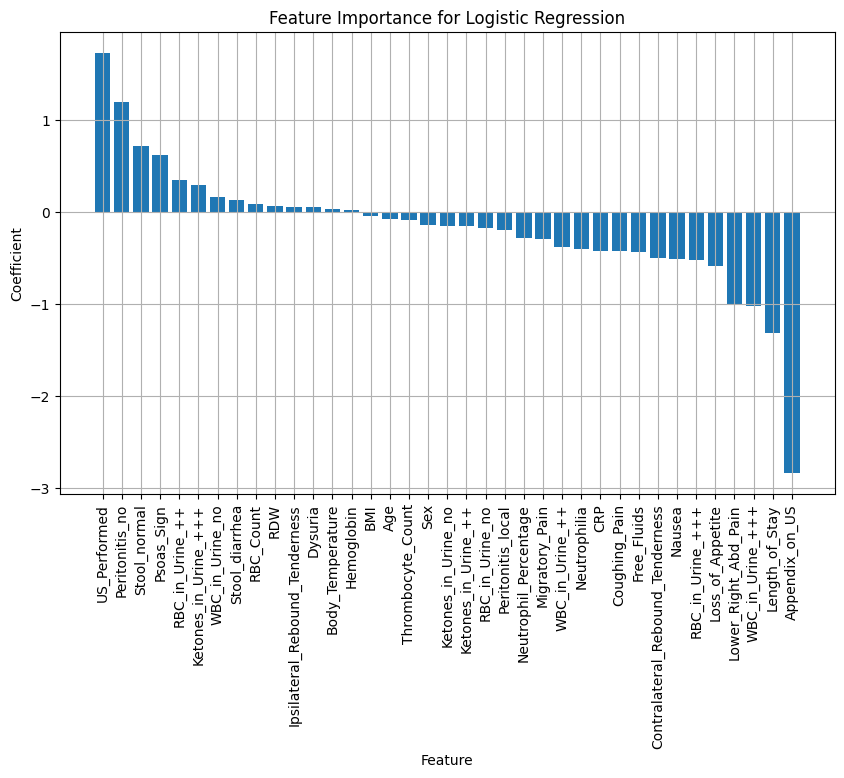

In [274]:
# Получение коэффициентов признаков
coefficients = log_reg.coef_[0]

# Получение отсортированных индексов признаков по их коэффициентам
sorted_indices_log_reg = np.argsort(coefficients)[::-1]

# Визуализация важности признаков для логистической регрессии
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients[sorted_indices_log_reg])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance for Logistic Regression')
plt.xticks(range(len(coefficients)), X_train.columns[sorted_indices_log_reg], rotation=90)
plt.grid(True)
plt.show()

### RandomForestClassifier

In [208]:
# Модель 3: Случайный лес
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("\nСлучайный лес")
print("Точность:", accuracy_forest)
print(classification_report(y_test, y_pred_forest))


Случайный лес
Точность: 0.8064516129032258
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        89
           1       0.77      0.77      0.77        66

    accuracy                           0.81       155
   macro avg       0.80      0.80      0.80       155
weighted avg       0.81      0.81      0.81       155



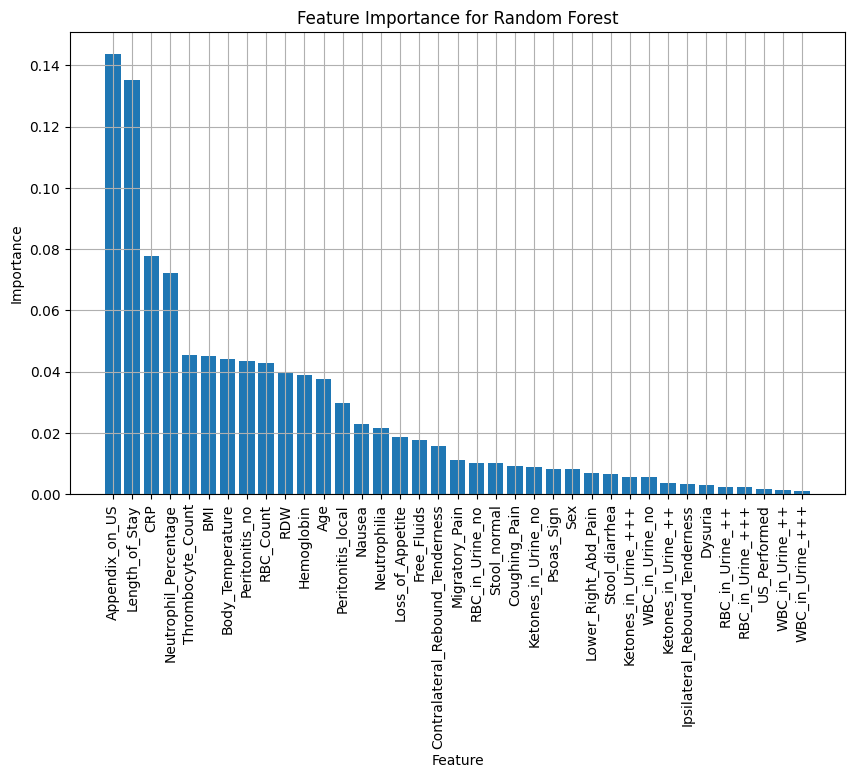

In [270]:
# Получение важности признаков
feature_importance_forest = forest_clf.feature_importances_

# Получение отсортированных индексов признаков по их важности
sorted_indices_forest = np.argsort(feature_importance_forest)[::-1]

# Визуализация важности признаков для случайного леса
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_forest)), feature_importance_forest[sorted_indices_forest])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest')
plt.xticks(range(len(feature_importance_forest)), X_train.columns[sorted_indices_forest], rotation=90)  # Поворот меток по оси X для лучшей читаемости
plt.grid(True)
plt.show()

### XGBClassifier

In [209]:
# Создайте и обучите XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nXGBClassifier")
print("Точность:", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb))


XGBClassifier
Точность: 0.8064516129032258
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        89
           1       0.79      0.74      0.77        66

    accuracy                           0.81       155
   macro avg       0.80      0.80      0.80       155
weighted avg       0.81      0.81      0.81       155



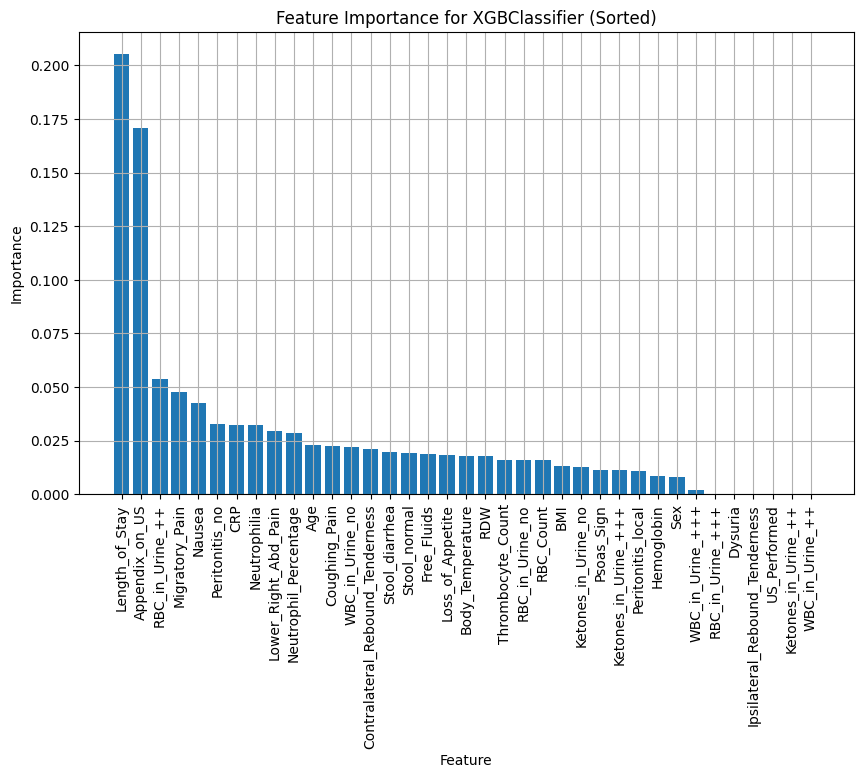

In [269]:
# Получение важности признаков
feature_importance = xgb.feature_importances_

# Получение отсортированных индексов признаков по их важности
sorted_indices = np.argsort(feature_importance)[::-1]

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for XGBClassifier (Sorted)')
plt.xticks(range(len(feature_importance)), X_train.columns[sorted_indices], rotation=90)  # Поворот меток по оси X для лучшей читаемости
plt.grid(True)
plt.show()

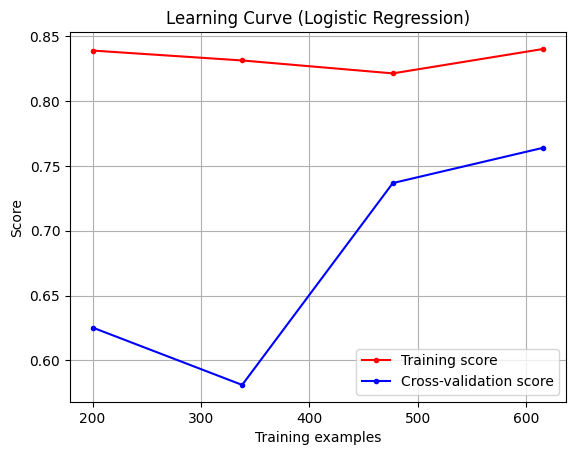

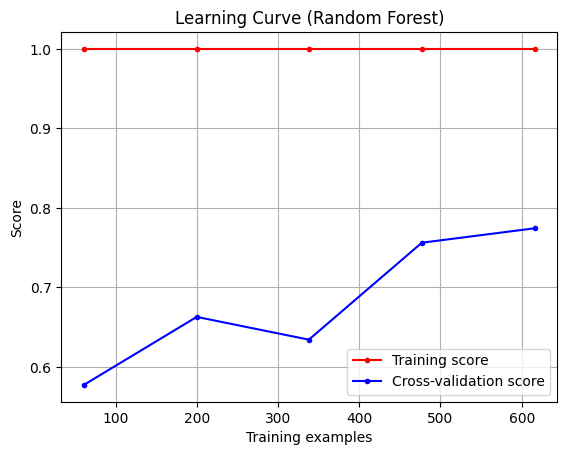

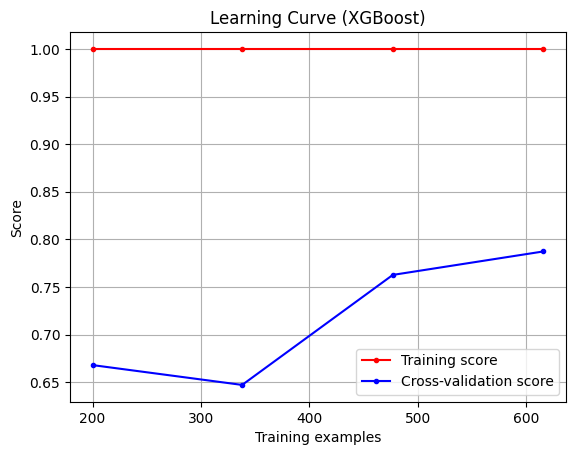

In [216]:
# Функция для построения кривых обучения
def plot_learning_curve(estimator, title, X, y):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, '.-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="b", label="Cross-validation score")

    plt.grid()
    plt.legend(loc="best")
    return plt



# Модель 1: Логистическая регрессия
plot_learning_curve(log_reg, "Learning Curve (Logistic Regression)", X, y)

# Модель 2: Случайный лес
plot_learning_curve(forest_clf, "Learning Curve (Random Forest)", X, y)

# Модель 3: XGBClassifier
plot_learning_curve(xgb, "Learning Curve (XGBoost)", X, y)

plt.show()


XGBClassifier
Точность: 0.7935483870967742
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        89
           1       0.76      0.76      0.76        66

    accuracy                           0.79       155
   macro avg       0.79      0.79      0.79       155
weighted avg       0.79      0.79      0.79       155



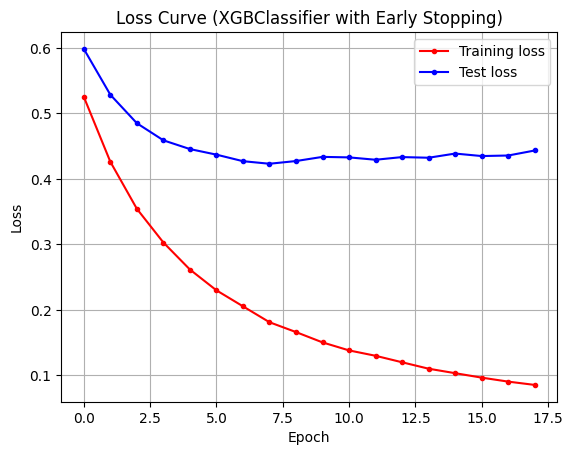

In [219]:
# Обучение XGBClassifier с ранней остановкой
xgb = XGBClassifier(random_state=42)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb.fit(X_train, y_train, eval_set=eval_set, verbose=False, early_stopping_rounds=10)

# Получение предсказаний модели на тестовом наборе данных
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

# Вывод точности и отчета о классификации
print("\nXGBClassifier")
print("Точность:", accuracy_xgb)
print(classification_report_xgb)

# Получение значений функции потерь на тренировочном и тестовом наборах данных
results = xgb.evals_result()
train_losses = results["validation_0"]["logloss"]
test_losses = results["validation_1"]["logloss"]

# Построение графика функции потерь
plt.figure()
plt.title("Loss Curve (XGBClassifier with Early Stopping)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(len(train_losses)), train_losses, '.-', color="r", label="Training loss")
plt.plot(range(len(test_losses)), test_losses, '.-', color="b", label="Test loss")
plt.grid()
plt.legend(loc="best")
plt.show()



### Нейронная сеть с PyTorch

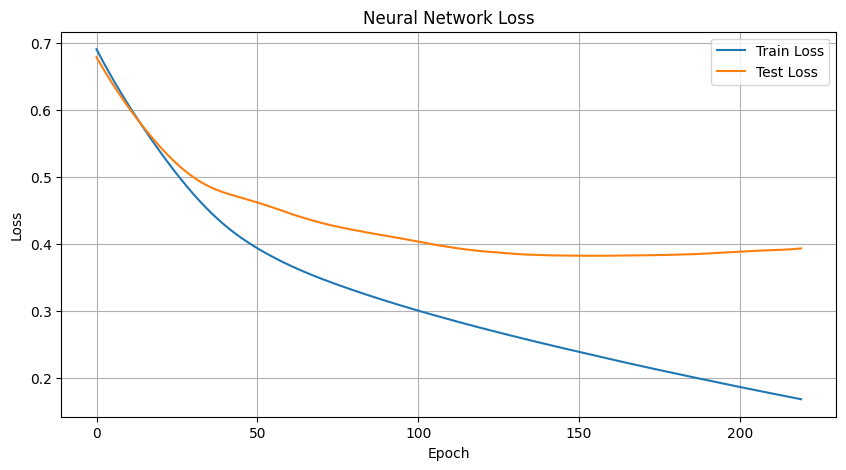

In [261]:
X_train_scaled = X_train.values
X_test_scaled = X_test.values

# Преобразование данных в тензоры PyTorch
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.long)
y_test_torch = torch.tensor(y_test.values, dtype=torch.long)

# Определение архитектуры нейронной сети
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Инициализация нейронной сети
input_size = X_train_torch.shape[1]
hidden_size = 100
num_classes = len(np.unique(y_train))
model = NeuralNet(input_size, hidden_size, num_classes)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение нейронной сети
num_epochs = 220
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        outputs = model(X_test_torch)
        loss = criterion(outputs, y_test_torch)
        test_losses.append(loss.item())

# Визуализация функции потерь
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Neural Network Loss')
plt.legend()
plt.grid()
plt.show()

In [262]:
# Предсказание на тестовом наборе данных
with torch.no_grad():
    outputs = model(X_test_torch)
    _, predicted = torch.max(outputs, 1)

# Вычисление точности
accuracy = (predicted == y_test_torch).sum().item() / len(y_test_torch)
print("\nPyTorch Neural Network")
print("Точность:", accuracy)
print(classification_report(y_test_torch, predicted))



PyTorch Neural Network
Точность: 0.832258064516129
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        89
           1       0.78      0.85      0.81        66

    accuracy                           0.83       155
   macro avg       0.83      0.83      0.83       155
weighted avg       0.84      0.83      0.83       155



### ВЫВОД

Наилучшая модель: Нейронная сеть с PyTorch, с точностью 0.83.

recall для класса 0 составляет 82%, а для класса 1 - 85%. Это означает, что модель неплохо находит все экземпляры для обоих классов.

f1-score для класса 0 равна 0.85, а для класса 1 - 0.81. F1-мера является средним гармоническим между точностью и полнотой и представляет собой обобщенную метрику качества классификации.

## Визуализация важности признаков

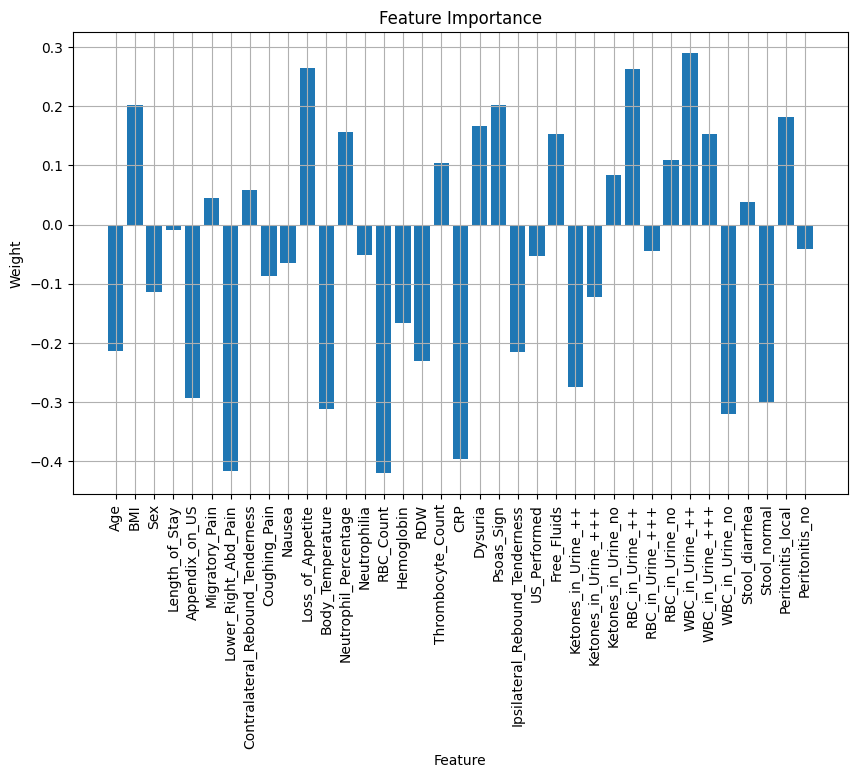

In [278]:
# Извлечение весов скрытого слоя
weights = model.fc1.weight.data.numpy()

# Извлечение названий признаков
feature_names = X_train.columns

# Визуализация важности признаков с их названиями
plt.figure(figsize=(10, 6))
plt.bar(feature_names, weights[0])
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
